<a href="https://colab.research.google.com/github/willclopes/Portfolio-Data-Science/blob/master/2_EDA_blocos_de_c%C3%B3digo_essenciais_para_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blocos de código essenciais para EDA - Regressão


---
By Willian C Lopes




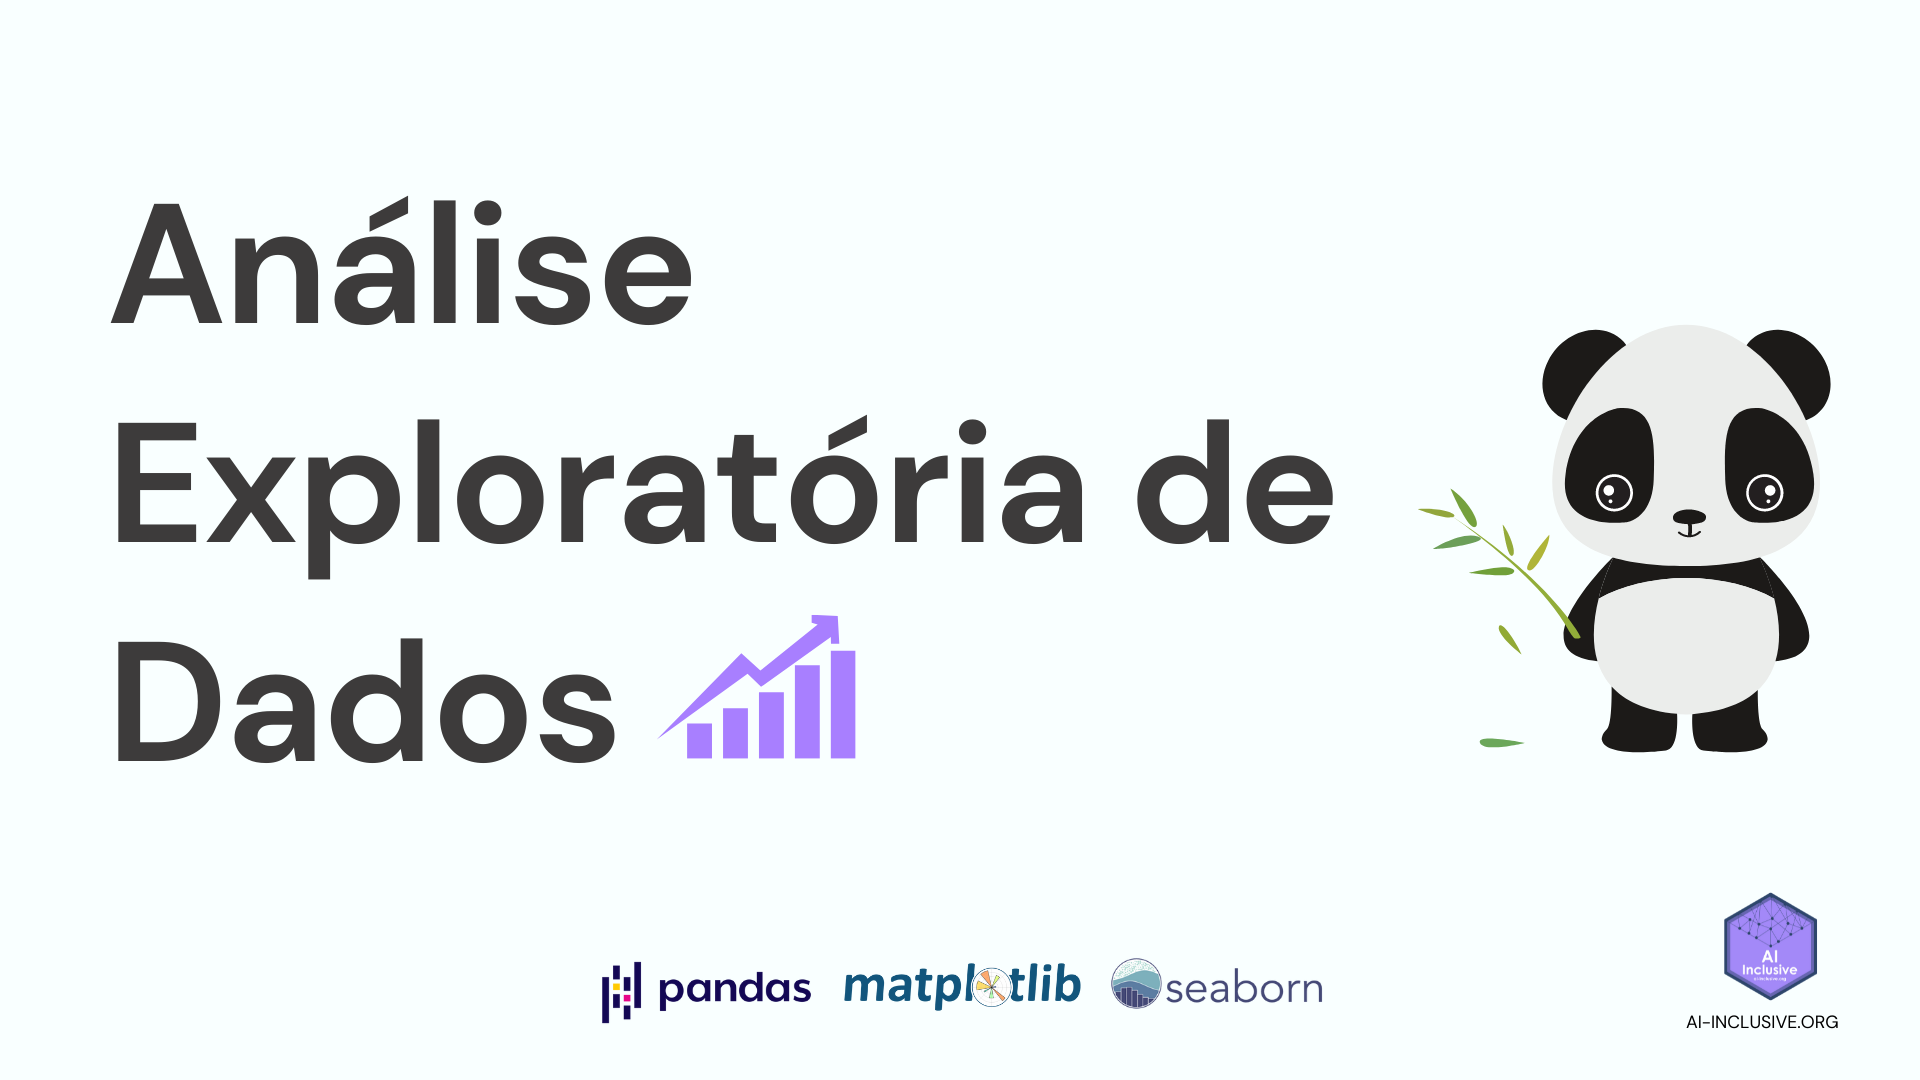

## Contexto

O objetivo deste projeto é aplicar EDA neste dataset do Kaggle para demonstrar alguns blocos de código que pode-se usar para realizar uma análise de dados exploratória no Mercado Habitacional de Melbourne.

## Introdução

A Análise Exploratória de Dados, ou EDA, é uma das primeiras etapas do processo de ciência de dados. Envolve aprender o máximo possível sobre os dados, sem perder muito tempo. Aqui, você obtém uma compreensão instintiva e prática de alto nível dos dados. Ao final deste notebook, você terá uma idéia geral da estrutura do conjunto de dados, algumas idéias de limpeza, a variável de destino e, possíveis técnicas de modelagem.

Existem algumas estratégias gerais para executar EDA rapidamente na maioria dos problemas. Neste artigo, usarei o conjunto do mercado habitacional do *Melbourne Housing* do kaggle para demonstrar os 11 blocos de código que pode-se usar para realizar uma análise de dados exploratória satisfatória. O conjunto de dados inclui endereço, tipo de imóvel, subúrbio, método de venda, quartos, preço, agente imobiliário (VendedorG), data de venda e distância de C.B.D. Você pode acompanhar baixando o conjunto de dados [aqui](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/download).

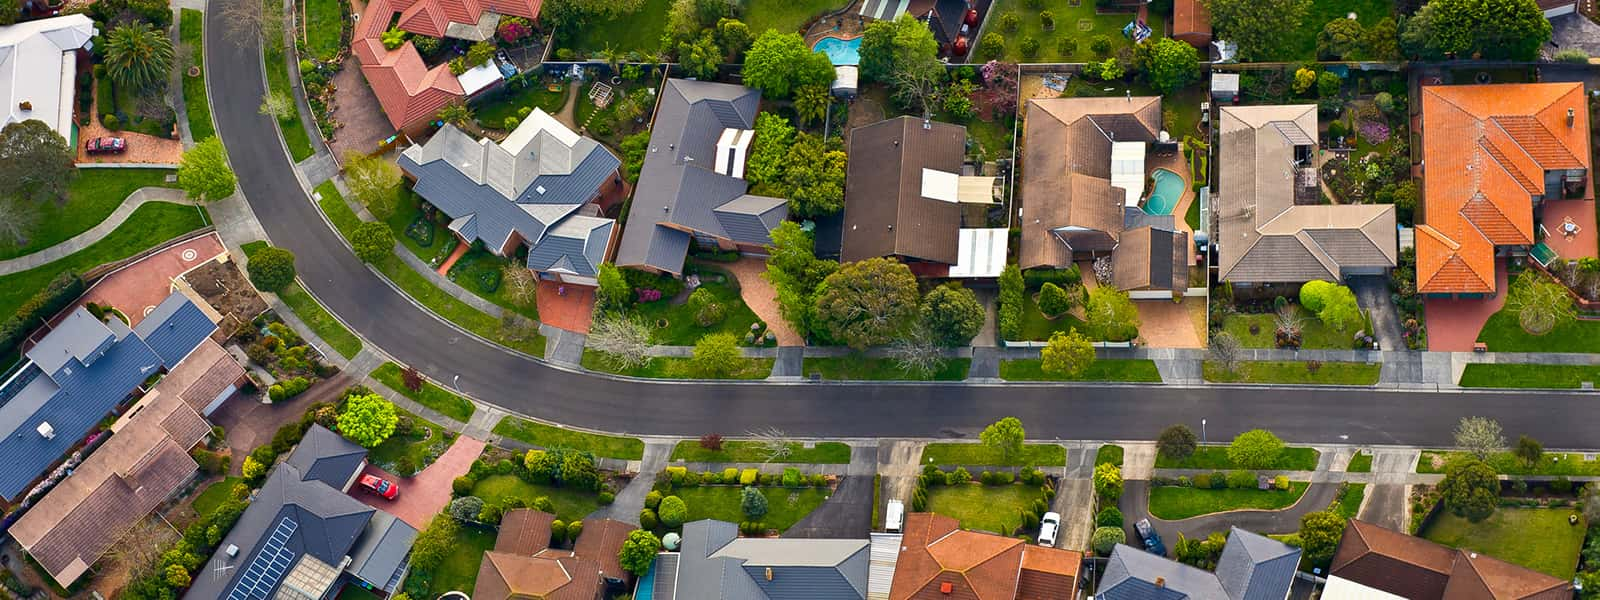

## Importar as Bibliotecas e o DataSet

A primeira etapa é importar as bibliotecas necessárias. Precisaremos de Pandas , Numpy , matplotlib e do seaborn . Para garantir que todas as nossas colunas sejam exibidas, use pd.set_option(’display.max_columns’, 100). Por padrão, o pandas exibe 20 colunas e esconde o resto.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',100)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set_style('darkgrid')


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/willclopes/Portfolio-Datasets/main/melb_data.csv')

## Exploração de conjunto de dados básicos

### 1. Forma (dimensões) do DataFrame

O atributos ".shape"  do Pandas DataFrame fornece uma estrutura geral dos dados. Ele retorna uma tupla que se traduz em quantas linhas de observações e colunas o conjunto de dados possui.

Podemos ver que o conjunto de dados tem 13.580 observações e 21 recursos, e um desses recursos é a variável de destino.

### 2. Tipos de dados das várias colunas

O ".dtypes" do DataFrame exibe os tipos de dados das colunas como uma série do Panda (série significa uma coluna de valores e seus índices).

In [ ]:
data.shape

(13580, 21)

In [ ]:
data.dtypes


Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

Observamos que nosso conjunto de dados possui uma combinação de recursos categóricos (objeto) e numéricos (float e int). Nesse ponto, voltamos à página do Kaggle para entender as colunas e seus significados. Verifique a tabela de colunas e suas definições [aqui](https://datawrapper.dwcdn.net/hHuXG/4/) criadas com [Datawrapper](https://www.datawrapper.de/).


---

* Quartos:	Número de quartos
Preço |	Preço em dólares

* Método:	S - imóvel vendido; SP - imóvel vendido anteriormente; PI - propriedade transmitida; PN - vendido antes não 
divulgado; SN - vendido não divulgado; NB - sem licitação; VB - oferta do fornecedor; W - retirado antes do leilão; SA - vendido após leilão; SS - vendido após o preço do leilão não divulgado. N / A - preço ou lance mais alto não disponível.
* Modelo:	br - quarto (s); h - casa, casa de campo, villa, semi, terraço; u - unidade, duplex; t - casa geminada; site dev - site de desenvolvimento; o res - outro residencial.
* VendedorG: 	Corretor de imóveis
* Encontro Data:	Data de venda
* Distância: Distância do CBD
* Nome da região: Região Geral (Oeste, Noroeste, Norte, Nordeste ... etc)
* Propertycount:	Quantidade de imóveis que existem no subúrbio.
* Quarto 2:	Nº de quartos raspados (de origem diferente)
* Banheiro:	Número de banheiros
* Carro:	Número de vagas
* Tamanho do terreno:	Tamanho do Terreno
* Area de construção:	Tamanho do Edifício
* CouncilArea:	Conselho governante para a área



---

O que procurar;

Recursos numéricos que devem ser categóricos e vice-versa.
Em uma análise rápida, não encontrei nenhuma incompatibilidade para os tipos de dados. Isso faz sentido, pois esta versão do conjunto de dados é um instantâneo limpo dos [dados](https://www.kaggle.com/anthonypino/melbourne-housing-market) originais de [Melbourne](https://www.kaggle.com/anthonypino/melbourne-housing-market) .



### 3. Exibir algumas linhas

O Pandas DataFrame tem funções muito úteis para exibir algumas observações. data.head() exibe as primeiras 5 observações, data.tail() as últimas 5 e data.sample() uma observação escolhida aleatoriamente no conjunto de dados. Você pode também exibir, por exemplo, 10 observações aleatórias usando data.sample(10)

#### O que procurar:

* Você consegue entender os nomes das colunas? Eles fazem sentido? 
(Verifique as definições de variáveis ​​novamente, se necessário)
* Os valores nessas colunas fazem sentido?
* Existem valores faltantes significativos (NaN) detectados?
* Que tipos de classes os recursos categóricos têm?

Observações: Há uma quantidade de valores ausentes significativos para *BuildingArea* e YearBuilt.

In [ ]:
## Encontra o número de valores nulos para todas as colunas
data.isnull().sum ()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
# Encontre o número de dados duplicados
data.duplicated().sum()

# Elimine as linhas duplicadas
#data.drop_duplicates (inplace = True )
# Quantidade de dados após remoção dos duplicados.
#data.shape 

0

## Distribuição

Refere-se a como os valores em um recurso são distribuídos ou com que frequência ocorrem. Para recursos numéricos, veremos quantas vezes os grupos de números aparecem em uma coluna específica e, para recursos categóricos, as classes de cada coluna e sua frequência. Usaremos gráficos e estatísticas de resumo reais. Os gráficos nos permitem ter uma ideia geral das distribuições, enquanto as estatísticas nos fornecem números factuais. Essas duas estratégias são recomendadas, pois se complementam.

## Recursos Numéricos

###4. Trace cada característica numérica

Usaremos o histograma do Pandas. Um histograma agrupa os números em intervalos (ou compartimentos) e a altura de uma barra mostra quantos números estão nesse intervalo. *df.hist()* plota um histograma dos atributos numéricos dos dados em uma grade. Também forneceremos os argumentos *figsize* e xrot para aumentar o tamanho da grade e girar o eixo x em 45 graus.

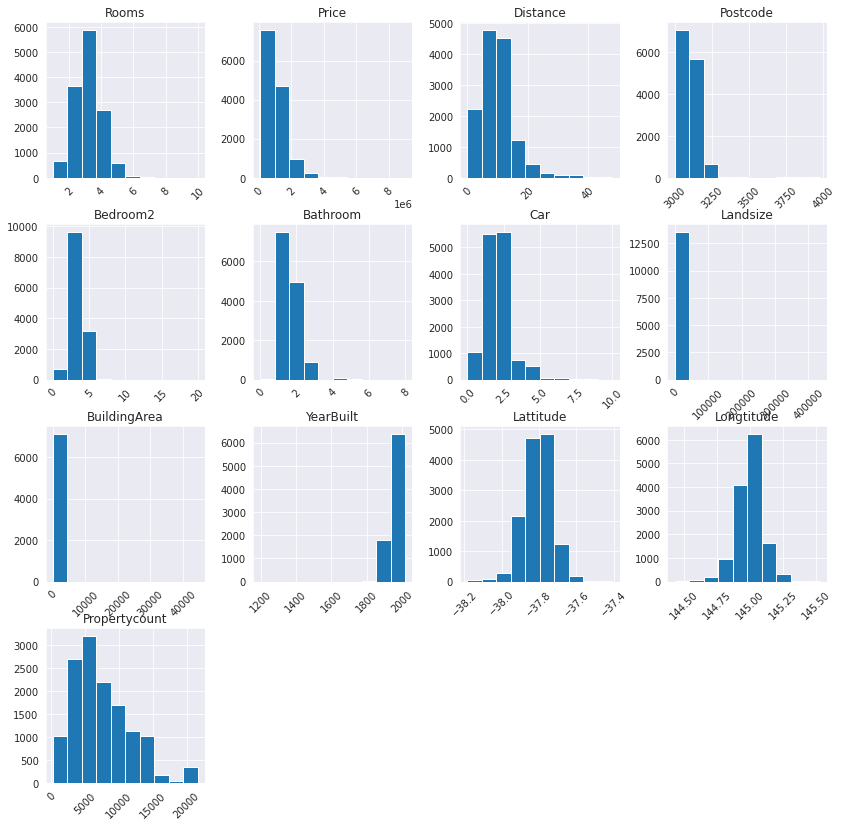

In [ ]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

### O que procurar:

* Possíveis outliers que não podem ser explicados ou podem ser erros de medição;

* Recursos numéricos que devem ser categóricos. Por exemplo, *Gender* representado por 1 e 0.

* Limites que não fazem sentido, como valores percentuais> 100.

Observações: No histograma, o *BuildingArea* e *LandSize* possui valores discrepantes em potencial à direita. Nosso atributo classe *Price* também foi altamente inclinado para a direita. Também notei que *YearBuilt* estava muito inclinado para a esquerda e o limite começava no ano 1200, o que era estranho. Vamos passar para as estatísticas descritiva para uma "visão" mais clara.

### 5. Estatísticas resumidas das características numéricas

Agora que temos uma noção intuitiva dos recursos numéricos, veremos as estatísticas reais usando o df.describe() o qual exibe sua estatística de resumo.



In [ ]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Podemos ver para cada característica numérica um range de valores, como a média, desvio padrão, mínimo valor, o 25º percentil, o 50º percentil, mediana, o 75º percentil, e o máximo valor. 

A partir dessa descrição, também podemos identificar os atributos com valores ausentes; sua contagem não é igual ao número total de linhas do conjunto de dados. Estes são *Car*, *LandSize* e *YearBuilt*.

Foi observado que o mínimo para *LandSize* e *BuildingArea* é 0. Também vemos que os *Price* estão em um intervalo de 85.000 a 9.000.000, que é um grande intervalo. Exploraremos essas colunas em uma análise detalhada posteriormente no projeto.

Olhando para o YearBuilt, no entanto, observamos que o ano mínimo é 1196. Esse pode ser um possível erro de entrada de dados que será removido durante a limpeza.

### Boxplots dos atributos numéricos com potenciais outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


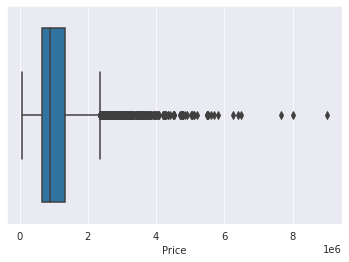

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


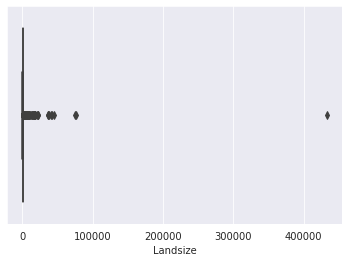

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


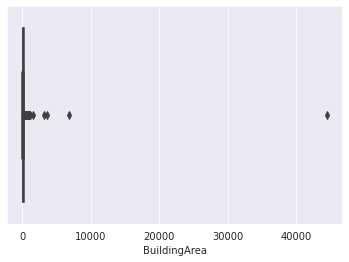

In [ ]:
cols = ['Price','Landsize','BuildingArea']
for col in cols:
    sns.boxplot(col, data=data)
    plt.show()

Vemos que **Landsize** e **Buildingarea** têm, cada um, um valor atípico que está muito distante dos outros valores.

## Características categóricas

### 6. Estatísticas resumidas das características categóricas

Para recursos categóricos, é importante mostrar as estatísticas de resumo antes de plotarmos os gráficos, porque alguns recursos têm muitas classes exclusivas (como veremos para o *Address*) e as classes seriam ilegíveis se visualizadas em um gráfico de contagem.

Para verificar as estatísticas de resumo apenas dos recursos categóricos, usaremos df.describe(include=’object’)



In [ ]:
data.describe (include = 'object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,53 William St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


Esta tabela é um pouco diferente daquela para atributos numéricos. Aqui, obtemos a contagem dos valores de cada atributo, o número de classes exclusivas, a classe mais frequente no topo e a frequência com que essa classe ocorre no conjunto de dados.

Notamos que algumas classes têm muitos valores exclusivos (ou únicos), como *Address*, seguido por *Suburb* e *SellerG*. 

A partir dessas descobertas, representarei apenas as colunas com 10 ou menos classes exclusivas. Também observamos que CouncilArea tem valores ausentes.

### 7. Analisar cada característica categórica

Usando as estatísticas acima, notamos que *Type*, *Method* além de *Regionname* possuem menos de 10 classes únicas que podem ser visualizados de forma eficaz. 

Faremos um gráfico desses atributos usando o gráfico de contagem do Seaborn, que é como um histograma para variáveis ​​categóricas. Cada barra em um gráfico de contagem representa uma classe única.

Foi criado um loop For . Para cada recurso categórico, um gráfico de contagem será exibido para mostrar como as classes são distribuídas para aquele recurso. 

A linha *df.select_dtypes(include=’object’)* seleciona as colunas categóricas com seus valores e os exibe. Também incluiremos uma instrução *If* para escolher apenas as três colunas com 10 ou menos classes usando a linha Series.nunique() < 10. Leia a .nunique() documentação [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html) .

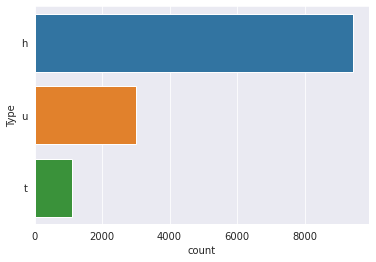

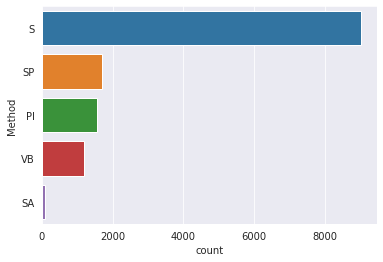

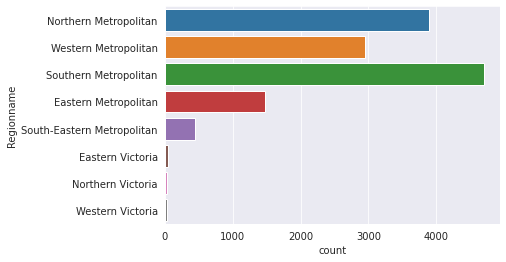

In [ ]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.countplot(y=column, data=data)
        plt.show()

### O que procurar:

* Classes esparsas que têm o potencial de afetar o desempenho de um modelo.

* Erros na identificação das classes, por exemplo, 2 classes exatas com pequenas diferenças de grafia.


Observação: Nota-se que Regionname tem algumas classes esparsas que podem precisar ser mescladas ou reatribuídas durante a modelagem.

## Agrupamento e segmentação

A segmentação nos permite "cortar" os dados e observar a relação entre características categóricas e numéricas.

### 8. Segmente a variável de destino por características categóricas.

Agora vamos comparar nosso atributo alvo *Price* com as várias classes de características categóricas (*Type*, *Methode* *Regionname*) para ver o comportamento da classe *Price* em relação as outras classes.

Usamos o *boxplot do Seaborn*, que representa a distribuição *Price* entre as classes categóricas. Abaixo, uma imagem que explica os recursos do boxplot claramente. Os pontos em ambas as extremidades representam outliers.



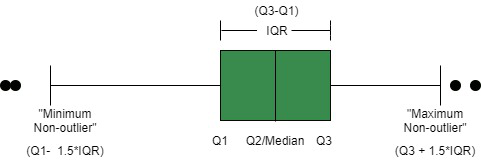

Imagem de www.geekeforgeeks.org

Novamente, foi usado um loop for para traçar um boxplot de cada atributo categórico com Price.

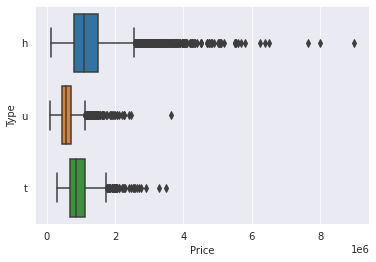

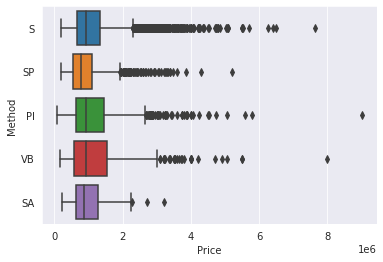

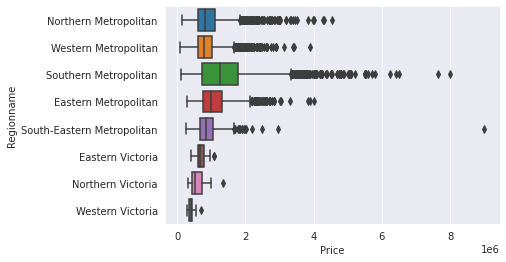

In [ ]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.boxplot(y=column, x='Price', data=data)
        plt.show()


### O que procurar:

* Quais classes afetam mais as variáveis ​​de destino.


Observe como o *Price* ainda está esparsamente distribuído entre as 3 classes esparsas *Regionname* vistas anteriormente.



Observe também como a classe *SA* (a classe menos frequente *Method*) possui preços altos, preços quase semelhantes da classe que ocorre com mais frequênciaS.

## 9. Agrupe recursos numéricos por cada recurso categórico.

Agora veremos como todos os outros atributos numéricos, não apenas *Price*, mudam com cada atributo categórico, resumindo os recursos numéricos entre as classes. 

Usamos a função [groupby do Dataframe ](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)para agrupar os dados por categoria e calcular uma métrica (como média , mediana , mínimo , padrão, etc.) em vários recursos numéricos.

Para apenas os 3 recursos categóricos com menos de 10 classes, agrupamos os dados e, em seguida, calculamos a média entre os atributos numéricos. Usamos os display() para mostrar os resultados em uma tabela mais limpa do que print().

In [ ]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        display(data.groupby(column).agg(['mean','std']))

Rooms                   Price                  Distance            \
          mean       std          mean            std       mean       std   
Type                                                                         
h     3.260874  0.851230  1.242665e+06  668078.742092  10.979479  6.165342   
t     2.837522  0.672654  9.337351e+05  395038.245773   9.851346  4.447395   
u     1.963871  0.629477  6.051275e+05  260987.452871   7.607391  4.476486   

         Postcode             Bedroom2            Bathroom            \
             mean        std      mean       std      mean       std   
Type                                                                   
h     3104.080643  98.449697  3.229336  0.879248  1.613822  0.732533   
t     3100.777379  72.529381  2.814183  0.679924  1.809695  0.599232   
u     3110.797481  68.361249  1.966523  0.628569  1.183295  0.411875   

           Car              Landsize              BuildingArea              \
          mean       std        mean          std         mean         std   
Type                                                                         
h     1.771222  1.054672  617.181924  4676.480273   176.866248  650.556175   
t     1.555655  0.574268  279.606822   655.849853   140.046323  147.917217   
u     1.128358  0.505223  477.314219  1728.507195    80.737121   50.631211   

        YearBuilt             Lattitude            Longtitude            \
             mean        std       mean       std        mean       std   
Type                                                                      
h     1954.081176  38.057215 -37.803795  0.084190  144.994700  0.114452   
t     1998.988189  20.404481 -37.815782  0.075767  144.996489  0.087462   
u     1980.016708  24.957520 -37.823710  0.060363  144.996363  0.068971   

     Propertycount               
              mean          std  
Type                             
h      7259.025505  4372.706394  
t      7094.459605  3981.676980  
u      8199.280080  4455.089348

Rooms                   Price                  Distance            \
            mean       std          mean            std       mean       std   
Method                                                                         
PI      3.077366  1.100700  1.133242e+06  730999.729516   9.482097  4.718632   
S       2.941809  0.894653  1.087327e+06  613785.634739  10.431523  5.978921   
SA      3.010870  0.907776  1.025772e+06  547952.730240  12.385870  7.306516   
SP      2.795655  0.978886  8.998924e+05  509987.899525  10.374692  6.476757   
VB      2.924103  1.125695  1.166510e+06  805411.614931   8.273728  4.832433   

           Postcode              Bedroom2            Bathroom            \
               mean         std      mean       std      mean       std   
Method                                                                    
PI      3106.742327   73.631725  3.062660  1.170073  1.714194  0.813059   
S       3106.171359   88.955408  2.914875  0.895283  1.498781  0.655106   
SA      3132.304348  136.249024  3.010870  0.919801  1.554348  0.685231   
SP      3096.480916  116.766616  2.785672  0.983641  1.456254  0.643366   
VB      3107.337781   74.690548  2.896580  1.123128  1.675563  0.790593   

             Car              Landsize               BuildingArea              \
            mean       std        mean           std         mean         std   
Method                                                                          
PI      1.703918  1.006568  521.682864    833.021478   158.783107   99.203980   
S       1.602581  0.944458  531.129905   1512.214413   155.781647  672.408128   
SA      1.769231  0.817543  699.532609   1516.261368   151.454318   99.549533   
SP      1.560472  0.983198  469.346447    635.464374   128.631366   70.088487   
VB      1.602359  1.011866  927.331943  12707.507836   152.419093  106.053772   

          YearBuilt             Lattitude            Longtitude            \
               mean        std       mean       std        mean       std   
Method                                                                      
PI      1965.621106  37.047066 -37.814429  0.070983  145.001865  0.091015   
S       1963.382091  35.945601 -37.808204  0.081956  144.997012  0.105528   
SA      1979.340000  29.532141 -37.818112  0.093876  145.023262  0.132737   
SP      1968.742958  35.292047 -37.804809  0.080340  144.972983  0.115776   
VB      1965.464807  47.941860 -37.815460  0.064030  145.002459  0.080346   

       Propertycount               
                mean          std  
Method                             
PI       7749.644501  4277.747352  
S        7496.049435  4447.414670  
SA       6945.902174  4190.494264  
SP       7093.759248  4368.763172  
VB       7307.331943  3961.228092

Rooms                   Price                 \
                                mean       std          mean            std   
Regionname                                                                    
Eastern Metropolitan        3.322230  0.914458  1.104080e+06  467417.860272   
Eastern Victoria            3.396226  0.630617  6.999808e+05  165498.190135   
Northern Metropolitan       2.755527  0.891448  8.981711e+05  443967.693818   
Northern Victoria           3.560976  0.807737  5.948293e+05  217761.670461   
South-Eastern Metropolitan  3.360000  0.803223  9.229438e+05  506525.336100   
Southern Metropolitan       2.860916  1.044614  1.372963e+06  822529.158614   
Western Metropolitan        3.023406  0.844428  8.664205e+05  394144.700287   
Western Victoria            3.406250  0.665237  3.975234e+05   86211.956532   

                             Distance               Postcode              \
                                 mean       std         mean         std   
Regionname                                                                 
Eastern Metropolitan        13.901088  4.312101  3111.162475   25.965495   
Eastern Victoria            34.209434  6.142984  3567.584906  331.906812   
Northern Metropolitan        8.078329  5.020135  3071.360925   72.109498   
Northern Victoria           33.748780  9.170281  3418.707317  229.039761   
South-Eastern Metropolitan  23.813556  7.236555  3225.255556  172.740079   
Southern Metropolitan        8.756656  3.720828  3156.714590   35.228621   
Western Metropolitan        10.104579  4.152871  3031.781208   48.577742   
Western Victoria            30.753125  1.540210  3337.687500    0.644455   

                            Bedroom2            Bathroom                 Car  \
                                mean       std      mean       std      mean   
Regionname                                                                     
Eastern Metropolitan        3.313392  0.912694  1.698844  0.726368  1.792916   
Eastern Victoria            3.396226  0.630617  1.811321  0.760986  2.056604   
Northern Metropolitan       2.734190  0.899294  1.367866  0.584488  1.454123   
Northern Victoria           3.560976  0.807737  1.853659  0.572755  1.925000   
South-Eastern Metropolitan  3.355556  0.810718  1.657778  0.659516  2.044444   
Southern Metropolitan       2.835144  1.068829  1.624068  0.765060  1.576264   
Western Metropolitan        2.990502  0.833986  1.501018  0.636786  1.696392   
Western Victoria            3.406250  0.665237  1.468750  0.507007  1.843750   

                                         Landsize               BuildingArea  \
                                 std         mean           std         mean   
Regionname                                                                     
Eastern Metropolitan        0.864764   634.133923    429.341067   178.001521   
Eastern Victoria            1.133665  2949.698113  11468.190530   183.645000   
Northern Metropolitan       0.982934   568.948072   7010.074541   124.177723   
Northern Victoria           1.095152  3355.463415   9495.868734  1746.374286   
South-Eastern Metropolitan  1.032987   613.991111    371.103513   162.734296   
Southern Metropolitan       0.886275   509.252183   1457.210080   153.580962   
Western Metropolitan        1.033847   493.606852   1125.854310   144.697623   
Western Victoria            0.846601   655.500000    245.501987   134.683810   

                                           YearBuilt             Lattitude  \
                                    std         mean        std       mean   
Regionname                                                                   
Eastern Metropolitan         263.464882  1971.859903  35.342712 -37.788820   
Eastern Victoria             108.954623  1984.032258  21.488732 -37.959292   
Northern Metropolitan        101.805098  1962.764286  39.875936 -37.747258   
Northern Victoria           8382.051281  1986.666667  22.189741 -37.599620   
South-Eastern Me

Podemos comparar as classes *Type*, *Method* e Regionname entre os recursos 
numéricos para ver como eles são distribuídos.

## Relações entre recursos numéricos e outros recursos numéricos

### 10. Matriz de correlações para as diferentes características numéricas

Uma [correlação](https://www.mathsisfun.com/data/correlation.html) é um valor entre -1 e 1 que equivale a quão próximos os valores de dois recursos separados se movem simultaneamente. Uma correlação positiva significa que à medida que um recurso aumenta, o outro também aumenta, enquanto uma correlação negativa significa que um recurso aumenta à medida que o outro diminui. Correlações próximas a 0 indicam um relacionamento fraco, enquanto as próximas a -1 ou 1 significam um relacionamento forte .

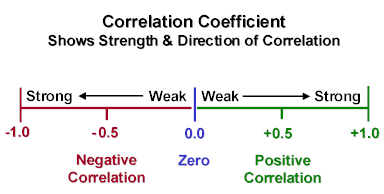

Imagem de www.edugyan.in

Usaremos df.corr() para calcular as [correlações](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/) entre os recursos numéricos e ele retorna um DataFrame.

In [ ]:
corrs = data.corr () 
corrs

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


Isso pode não significar muito agora, então vamos traçar um mapa de calor para visualizar as correlações.

## 11. Mapa de calor das correlações

Usaremos um [mapa de calor](https://seaborn.pydata.org/generated/seaborn.heatmap.html) Seaborn para plotar a grade como uma matriz retangular codificada por cores. Nós usamos sns.heatmap(corrs, cmap=’RdBu_r’,annot=True).

O cmap=‘RdBu_r’é um argumento que informa ao mapa de calor qual paleta de cores usar. 

Uma correlação positiva alta aparece como vermelho escuro e uma correlação negativa alta como azul escuro . Mais perto do branco significa um relacionamento fraco. Leia [este bom tutorial](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f) para outras paletas de cores. annot=Trueinclui os valores das correlações nas caixas para facilitar a leitura e interpretação.

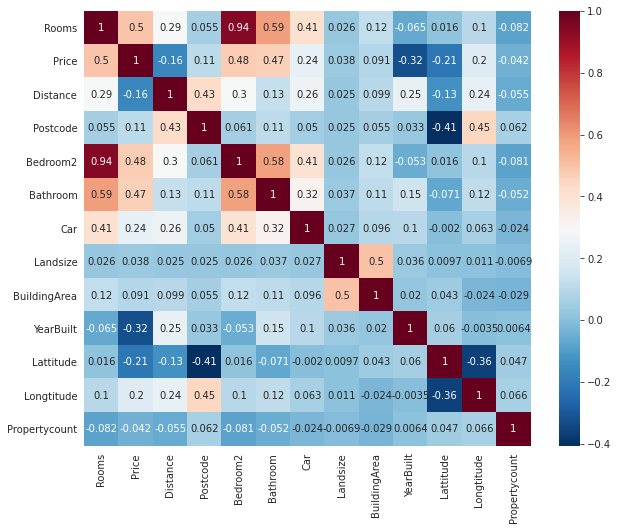

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

#### O que procurar:

* Recursos fortemente correlacionados; vermelho escuro (positivo) ou azul escuro (negativo).

* Atributo classe: Se tem fortes relações positivas ou negativas com outras características.


Notamos que *Rooms*, *Bedrooms2*, *Bathrooms*, e *Price* possuem relacionamentos positivos fortes. Por outro lado, *Price* tem uma correlação negativa levemente fraca com *YearBuilt* e uma relação negativa ainda mais fraca com *Distance*.

# Fechamento

Neste artigo, exploramos o conjunto de dados de Melbourne e obtivemos uma compreensão de alto nível da estrutura e de seus recursos.

## Referências

* https://pandas.pydata.org/
* https://seaborn.pydata.org/
* https://towardsdatascience.com/
* https://medium.com/@suemnjeri



---




# Contatos


[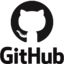](https://github.com/willclopes)


---


[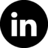 ](https://www.linkedin.com/in/willclopes/)





---

[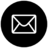](willclopes@gmail.com)

 



